In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

### Cargamos el dataset

In [3]:
df = pd.read_csv("df_mini_HS.csv")
print(df.head())

   label                                               text
0      1  ESAS COSAS Y OTRAS PUEDEN PASAR POR MANTENER A...
1      1  28: te amodio, odio a la perra de tu amiga ☺️☺...
2      1  @LaDivinaDiva Callate maldita perra. O seguro ...
3      1  @MarysabelPuerto Mejor callate cara de puta o ...
4      1  @xarita327 @TRIKYHUMOR @yonier2012 @casTa1326 ...


In [11]:
df

,label,text
0,1,ESAS COSAS Y OTRAS PUEDEN PASAR POR MANTENER A...
1,1,"28: te amodio, odio a la perra de tu amiga ☺️☺..."
2,1,@LaDivinaDiva Callate maldita perra. O seguro ...
3,1,@MarysabelPuerto Mejor callate cara de puta o ...
4,1,@xarita327 @TRIKYHUMOR @yonier2012 @casTa1326 ...
5,1,@CocotePR @ashleyhonohan callate puta
6,1,Y el inmigrante recibe ayuda del rico Estado l...
7,1,"De los moros no se puede esperar nada bueno, y..."
8,1,¿Por que si a una mujer le pegan un tiro en la...
9,1,"Analicemos esto: ¿Si te pones unos shorts así,..."


In [6]:
vectorizer = CountVectorizer(stop_words='english')

# Se eliminan caracteres especiales y simbolos o emotes

In [23]:
def preprocesar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^a-záéíóúüñ ]', '', texto)  # Remover caracteres especiales
    texto = texto.lower()
    texto = re.sub(r"@\S+", "", texto)  # Eliminar menciones a usuarios
    texto = re.sub("http[s]?\://\S+", "", texto)  # Eliminar enlaces
    texto = re.sub(r"#\S+", "", texto)  # Eliminar hashtags
    texto = re.sub(r"[0-9]", "", texto)  # Eliminar números
    texto = re.sub(r"(\(.*\))|(\[.*\])", "", texto)  # Eliminar paréntesis y corchetes
    texto = re.sub(r"\n", "", texto)  # Eliminar caracteres de nueva línea
    texto = re.sub(r"(http[s]?\://\S+)|([\[\(].*[\)\]])|([#@]\S+)|\n", "", texto)  # Eliminar varios patrones
    texto = re.sub(r"(\.)|(,)", "", texto)  # Eliminar puntos y comas
    texto = re.sub(r"[¡!]", "", texto)  # Eliminar signos de admiración 
    texto = re.sub(r"[¿?]", "", texto)
    return texto

# Aplicamos el preprocesamiento
df['text'] = df['text'].apply(preprocesar_texto)
df

<>:6: SyntaxWarning: invalid escape sequence '\:'
<>:6: SyntaxWarning: invalid escape sequence '\:'
/tmp/ipykernel_43916/1067313372.py:6: SyntaxWarning: invalid escape sequence '\:'
  texto = re.sub("http[s]?\://\S+", "", texto)  # Eliminar enlaces


,label,text
0,1,esas cosas y otras pueden pasar por mantener a...
1,1,te amodio odio a la perra de tu amiga pero tú...
2,1,ladivinadiva callate maldita perra o seguro er...
3,1,marysabelpuerto mejor callate cara de puta o r...
4,1,xarita trikyhumor yonier casta lizmontoyapan e...
5,1,cocotepr ashleyhonohan callate puta
6,1,y el inmigrante recibe ayuda del rico estado l...
7,1,de los moros no se puede esperar nada bueno y ...
8,1,por que si a una mujer le pegan un tiro en la ...
9,1,analicemos esto si te pones unos shorts así en...


# Tokenizar cada elemento del Df

In [24]:
def tokenizar_texto(texto):
    return word_tokenize(texto)


# Aplicamos la tokenización a la columna 'text' del DataFrame
df['tokens'] = df['text'].apply(tokenizar_texto)
print(df[['text', 'tokens']].head())

                                                text  \
0  esas cosas y otras pueden pasar por mantener a...   
1   te amodio odio a la perra de tu amiga pero tú...   
2  ladivinadiva callate maldita perra o seguro er...   
3  marysabelpuerto mejor callate cara de puta o r...   
4  xarita trikyhumor yonier casta lizmontoyapan e...   

                                              tokens  
0  [esas, cosas, y, otras, pueden, pasar, por, ma...  
1  [te, amodio, odio, a, la, perra, de, tu, amiga...  
2  [ladivinadiva, callate, maldita, perra, o, seg...  
3  [marysabelpuerto, mejor, callate, cara, de, pu...  
4  [xarita, trikyhumor, yonier, casta, lizmontoya...  


### Se filtran las plabras como conectores

In [26]:
def tokenizar_y_filtrar_stopwords(texto):
    tokens = word_tokenize(texto)  # Tokenizamos el texto
    palabras_filtradas = [palabra for palabra in tokens if palabra.lower() not in spanish_stopwords]  # Filtramos stopwords
    return palabras_filtradas

df['tokens_filtrados'] = df['text'].apply(tokenizar_y_filtrar_stopwords)

# Verificamos los primeros resultados
print(df[['text', 'tokens_filtrados']].head())

                                                text  \
0  esas cosas y otras pueden pasar por mantener a...   
1   te amodio odio a la perra de tu amiga pero tú...   
2  ladivinadiva callate maldita perra o seguro er...   
3  marysabelpuerto mejor callate cara de puta o r...   
4  xarita trikyhumor yonier casta lizmontoyapan e...   

                                    tokens_filtrados  
0  [cosas, pueden, pasar, mantener, inmigracion, ...  
1       [amodio, odio, perra, amiga, vida, tijerazo]  
2  [ladivinadiva, callate, maldita, perra, seguro...  
3  [marysabelpuerto, mejor, callate, cara, puta, ...  
4  [xarita, trikyhumor, yonier, casta, lizmontoya...  


In [18]:

# Convertimos el texto a Bag of Words
X = vectorizer.fit_transform(df['text'])

# Visualizamos las palabras y su frecuencia
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df_bow)

    abces  acoso  agar  agresión  al  amiga  amodio  analicemos  aprieto  \
0       0      0     0         1   0      0       0           0        1   
1       0      0     0         0   0      1       1           0        0   
2       0      0     0         0   0      0       0           0        0   
3       0      0     0         0   0      0       0           0        0   
4       0      0     0         0   0      0       0           0        0   
5       0      0     0         0   0      0       0           0        0   
6       0      0     0         0   0      0       0           0        0   
7       0      0     0         0   0      0       0           0        0   
8       0      0     0         0   0      0       0           0        0   
9       0      1     0         0   0      0       0           1        0   
10      0      0     0         0   0      0       0           0        0   
11      0      0     1         0   0      0       0           0        0   
12      0   

## Se muestrar las palabras más frecuentes adjuntando las *stop words*

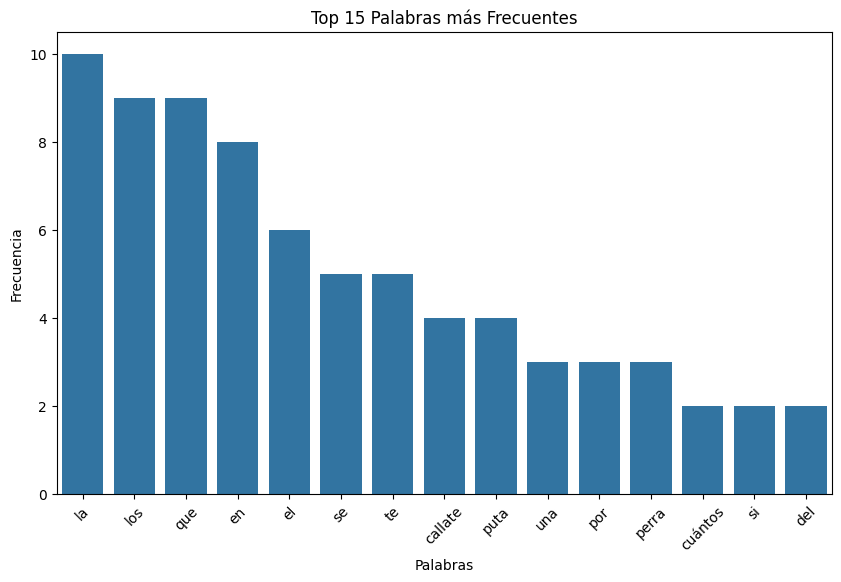

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# frecuencias de las palabras
frequencias_palabras = df_bow.sum(axis=0)

# ordena las palabras más frecuentes
df_frecuencias = pd.DataFrame(frequencias_palabras, index=vectorizer.get_feature_names_out(), columns=['frecuencia'])
df_frecuencias = df_frecuencias.sort_values(by='frecuencia', ascending=False).head(15)  # Top 15 palabras


plt.figure(figsize=(10, 6))
sns.barplot(x=df_frecuencias.index, y=df_frecuencias['frecuencia'])
plt.xticks(rotation=45) 
plt.title('Top 15 Palabras más Frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()